In [1]:
#set up packages
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine
import ast

In [2]:
#import csv with comment data

# Access the CSV file
# Read CSV into Pandas DataFrame
final_df = pd.read_csv('data/final_data.csv')


In [3]:
#check how many comments
len(final_df)

71305

In [4]:
def clean_dict(string_dict, key):
    '''
    string_dict: dictionary that is in string form
    key: TOXICITY or IDENTITY ATTACK depending on which dictionary is being cleaned
    Return: string passed through in dictionary form 
    '''
    if type(string_dict) == str:
        return ast.literal_eval(string_dict)[key]
    else:
        return None

In [5]:
#apply clean dict function to extract toxicity score and identity score 
final_df['toxicity_score'] = final_df['perspective_scores'].apply(lambda x: clean_dict(x, 'TOXICITY') if x else None)
final_df['identity_attack_score'] = final_df['perspective_scores'].apply(lambda x: clean_dict(x, 'IDENTITY_ATTACK') if x else None)

In [6]:
#filter out comments where a perspective score was not returned 
final_df = final_df[final_df['perspective_scores'].notna()]

#drop unnecessary columns
df = final_df.drop(['perspective_scores', 'Unnamed: 0.1', 'Unnamed: 0' ], axis=1)

In [7]:
def above_70(score):
    '''
    checks whether score is above 0.7
    returns 1 or 0
    '''
    if score > .70:
        return 1
    else:
        return 0

In [8]:
#use above_70 function to see if a comment is toxic or attacks identity
df['toxic'] = df['toxicity_score'].apply(lambda x: above_70(x) if x else None)
df['identity_attack'] = df['identity_attack_score'].apply(lambda x: above_70(x) if x else None)

In [9]:
#filter out any data errors in the game column
df = df[df['game'].notna()]

In [10]:
#creates a dictionary mapping game name to the game number for visualization purposes later 
game_dict = {' Group Stage USA vs Vietnam': 'Game 1: Group Stage USA vs Vietnam', ' Group Stage USA vs Netherlands': 'Game 2: Group Stage USA vs Netherlands',
       ' Group Stage USA vs Portugal' : 'Game 3: Group Stage USA vs Portugal', ' Round of 16 USA vs Sweden': 'Game 4: Round of 16 USA vs Sweden'}
df['Game Number'] = df['game'].map(game_dict)

In [11]:
df.head()

,game,video_id,comment_like_count,text,reply_count,comment_date,text_string,roberta_hs_score,roberta_label,roberta_score,toxicity_score,identity_attack_score,toxic,identity_attack,Game Number
0,Group Stage USA vs Vietnam,mg5R3CnlFeM,0,it's been a while since I've been happy merced...,0.0,2023-07-22 17:52:55 UTC,it's been a while since I've been happy merced...,"[{'label': 'nothate', 'score': 0.99985671043396}]",0,0.999857,0.087165,0.010507,0,0,Game 1: Group Stage USA vs Vietnam
1,Group Stage USA vs Vietnam,mg5R3CnlFeM,0,It's shocking how bad these teams actually are,0.0,2023-07-22 17:45:09 UTC,It's shocking how bad these teams actually are,"[{'label': 'nothate', 'score': 0.9998511075973...",0,0.999851,0.200562,0.024600,0,0,Game 1: Group Stage USA vs Vietnam
2,Group Stage USA vs Vietnam,mg5R3CnlFeM,0,USA Wohoooooo good begInning girls !! 👏 👏,0.0,2023-07-22 17:43:44 UTC,USA Wohoooooo good begInning girls !! 👏 👏,"[{'label': 'hate', 'score': 0.765491247177124}]",1,0.765491,0.031213,0.011025,0,0,Game 1: Group Stage USA vs Vietnam
3,Group Stage USA vs Vietnam,mg5R3CnlFeM,0,What Vietnam needs is to have those Vietnamese...,0.0,2023-07-22 17:41:35 UTC,What Vietnam needs is to have those Vietnamese...,"[{'label': 'hate', 'score': 0.9989185333251953}]",1,0.998919,0.086373,0.057947,0,0,Game 1: Group Stage USA vs Vietnam
4,Group Stage USA vs Vietnam,mg5R3CnlFeM,0,Repent to Jesus Christ “Make sure that nobody ...,0.0,2023-07-22 17:37:59 UTC,Repent to Jesus Christ “Make sure that nobody ...,"[{'label': 'nothate', 'score': 0.9908456206321...",0,0.990846,0.012629,0.005624,0,0,Game 1: Group Stage USA vs Vietnam


# Perspective Score Visualization

In [12]:
#import plotnine and ggplot features 
from plotnine import *

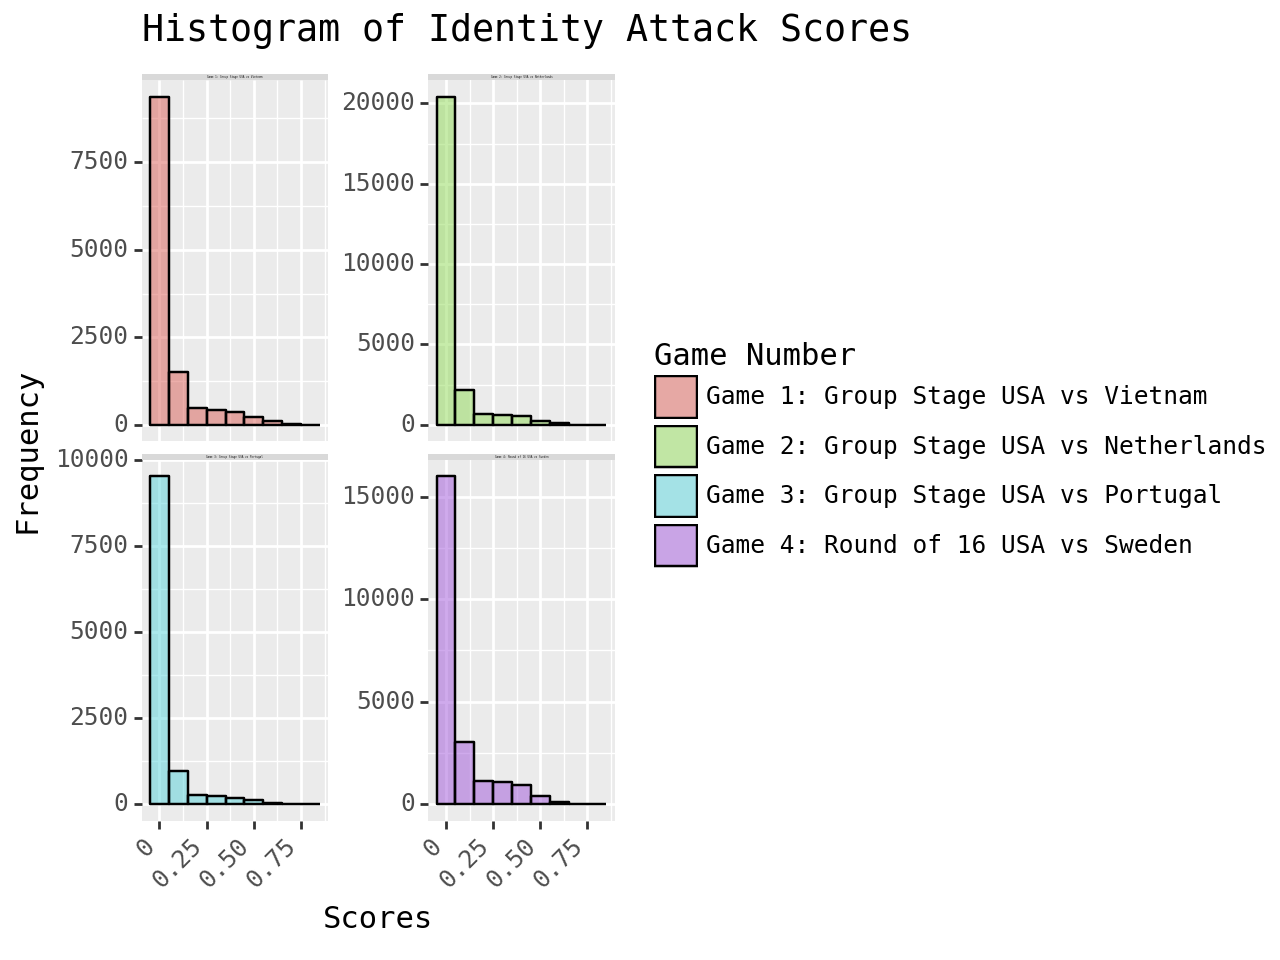

In [13]:
# Create the Histogram of Identity Attack Scores 
histogram_plot_identity = (ggplot(df, aes(x='identity_attack_score', fill='Game Number'))
                  + geom_histogram(binwidth=0.1, position='identity', alpha=0.5, color='black')
                  + facet_wrap('Game Number', scales='free_y')
                  + labs(title='Histogram of Identity Attack Scores',
                         x='Scores', y='Frequency')
                  + theme(axis_text_x=element_text(angle=45, hjust=1), text=element_text(family='monospace'),
                          strip_text=element_text(size=0)))


# Display the plot
print(histogram_plot_identity)

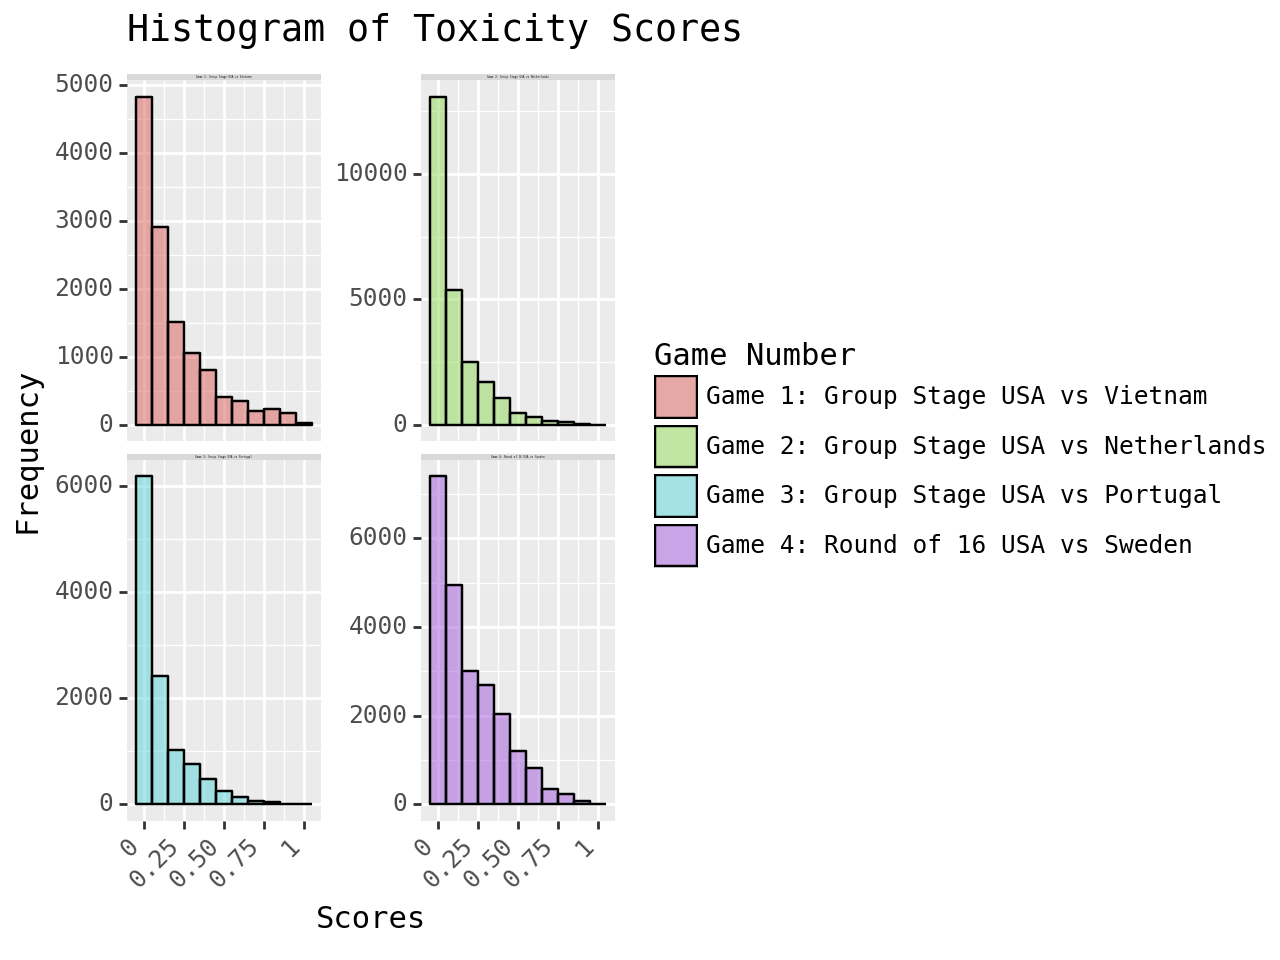

In [14]:
# Create the Histogram of Toxicity Scores 
histogram_plot_toxic = (ggplot(df, aes(x='toxicity_score', fill='Game Number'))
                  + geom_histogram(binwidth=0.1, position='identity', alpha=0.5, color='black')
                  + facet_wrap('Game Number', scales='free_y')
                  + labs(title='Histogram of Toxicity Scores',
                         x='Scores', y='Frequency')
                  + theme(axis_text_x=element_text(angle=45, hjust=1), text=element_text(family='monospace'),
                          strip_text=element_text(size=0)))


# Display the plot
print(histogram_plot_toxic)

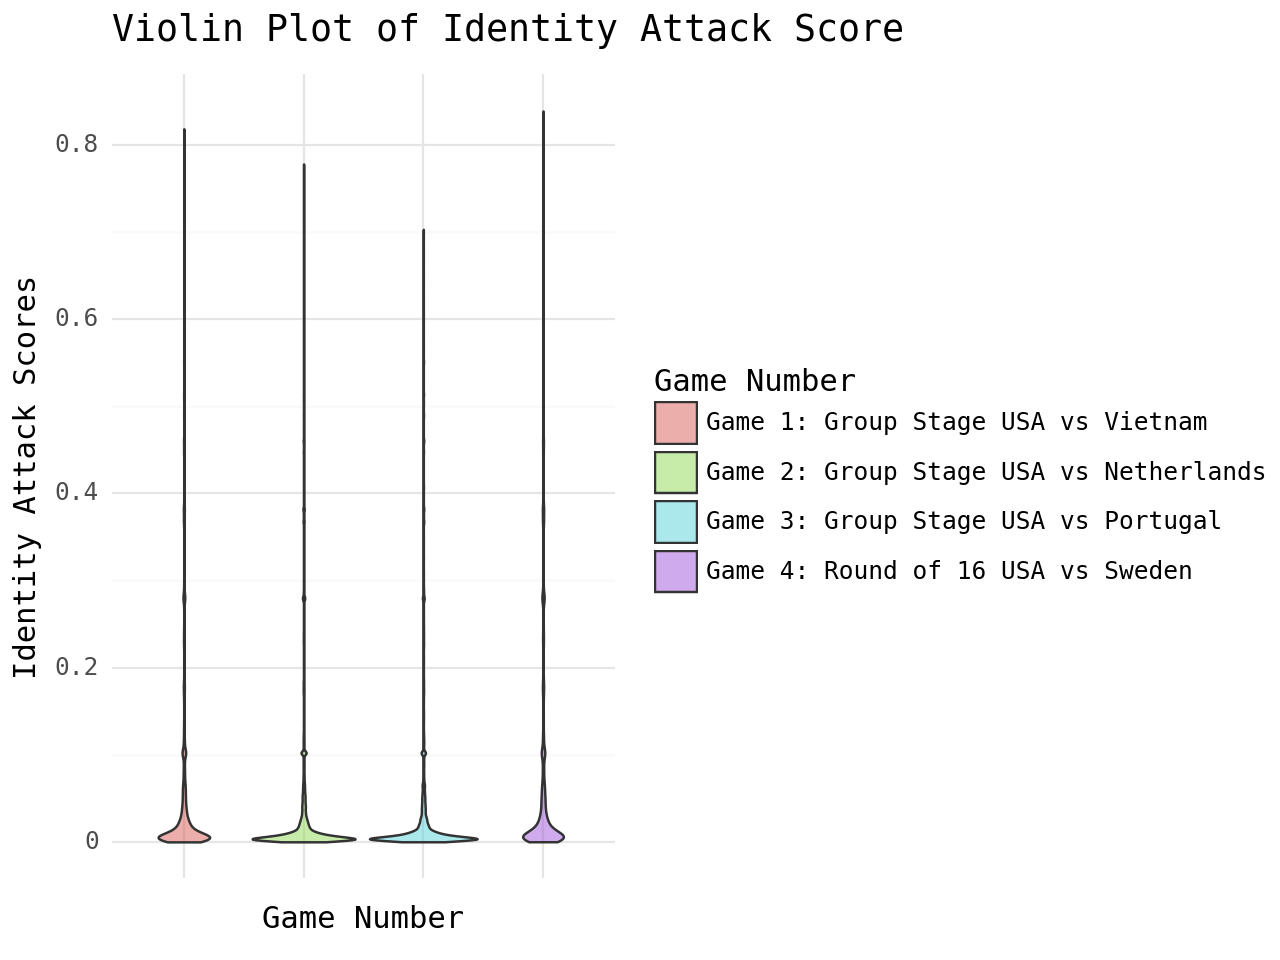

''

In [15]:
# Create the ggplot with violin plot of Identity Attack Score
violin_plot_id = (ggplot(df, aes(x='Game Number', y='identity_attack_score', fill='Game Number'))
               + geom_violin(alpha=0.5)
               + theme_minimal()
               + theme(axis_text_x= element_blank(), text=element_text(family='monospace'))  # Rotate x-axis ticks
               + labs(title='Violin Plot of Identity Attack Score',
                      x='Game Number', y='Identity Attack Scores'))

# Display the plot
print(violin_plot_id)
;

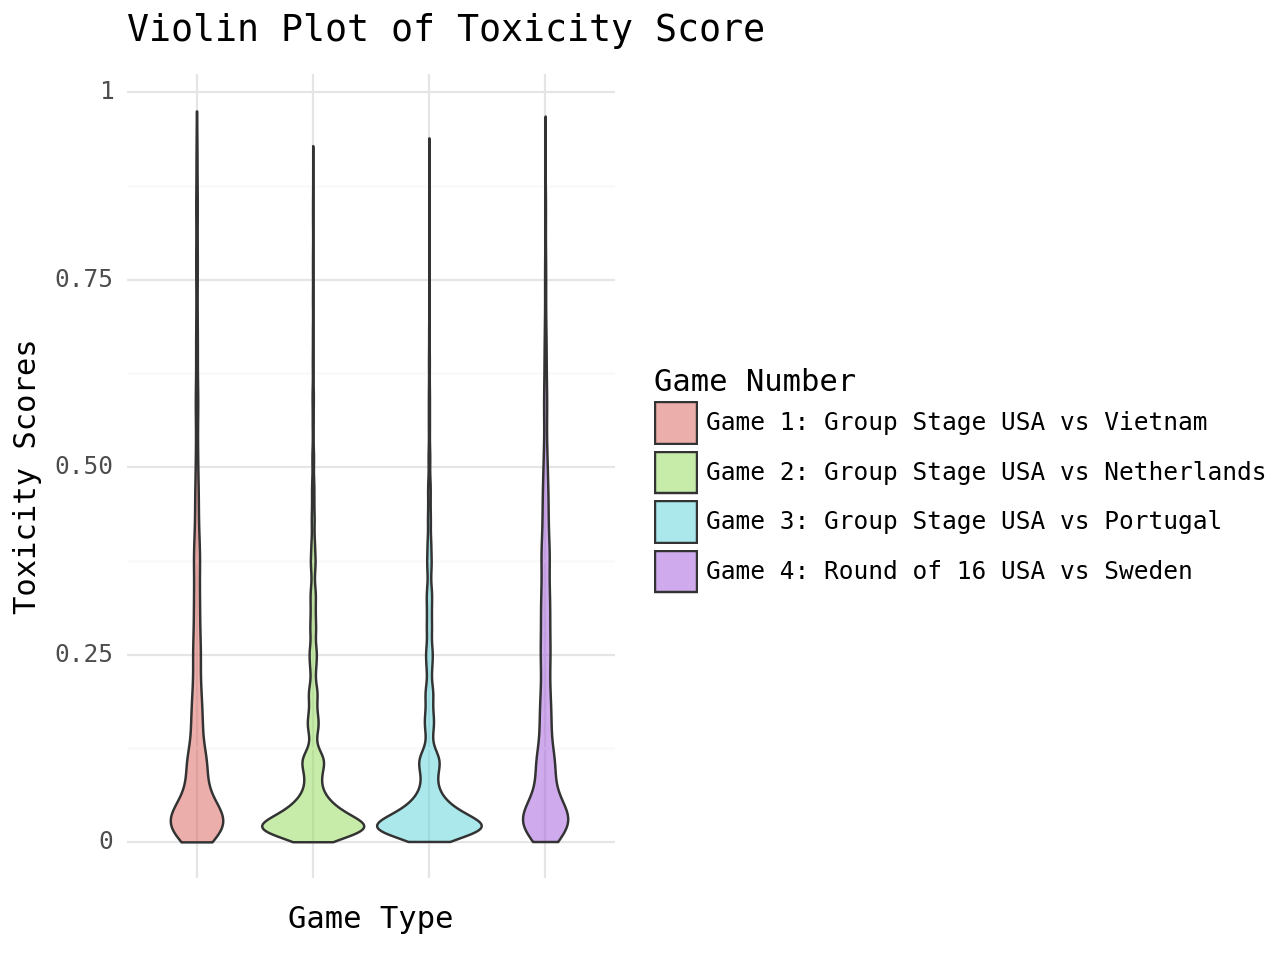

In [16]:
# Create the ggplot with violin plot of toxicity score
violin_plot_t = (ggplot(df, aes(x='Game Number', y='toxicity_score', fill='Game Number'))
               + geom_violin(alpha=0.5)
               + theme_minimal()
               + theme(axis_text_x= element_blank(), text=element_text(family='monospace'))  # Rotate x-axis ticks
               + labs(title='Violin Plot of Toxicity Score',
                      x='Game Type', y='Toxicity Scores'))

# Display the plot
print(violin_plot_t);

# Analysis on Replies and Likes

In [17]:
#Group number of replies by game and whether hate speech vs not hate speech 
total_comments = df.groupby(['Game Number', 'roberta_label'])['reply_count'].sum().reset_index(name='Total Replies')
total_comments['label'] = total_comments['roberta_label'].replace({0: 'Not Hate', 1: 'Hate'})
total_comments

,Game Number,roberta_label,Total Replies,label
0,Game 1: Group Stage USA vs Vietnam,0,5839.0,Not Hate
1,Game 1: Group Stage USA vs Vietnam,1,471.0,Hate
2,Game 2: Group Stage USA vs Netherlands,0,9795.0,Not Hate
3,Game 2: Group Stage USA vs Netherlands,1,671.0,Hate
4,Game 3: Group Stage USA vs Portugal,0,3635.0,Not Hate
5,Game 3: Group Stage USA vs Portugal,1,217.0,Hate
6,Game 4: Round of 16 USA vs Sweden,0,8924.0,Not Hate
7,Game 4: Round of 16 USA vs Sweden,1,408.0,Hate


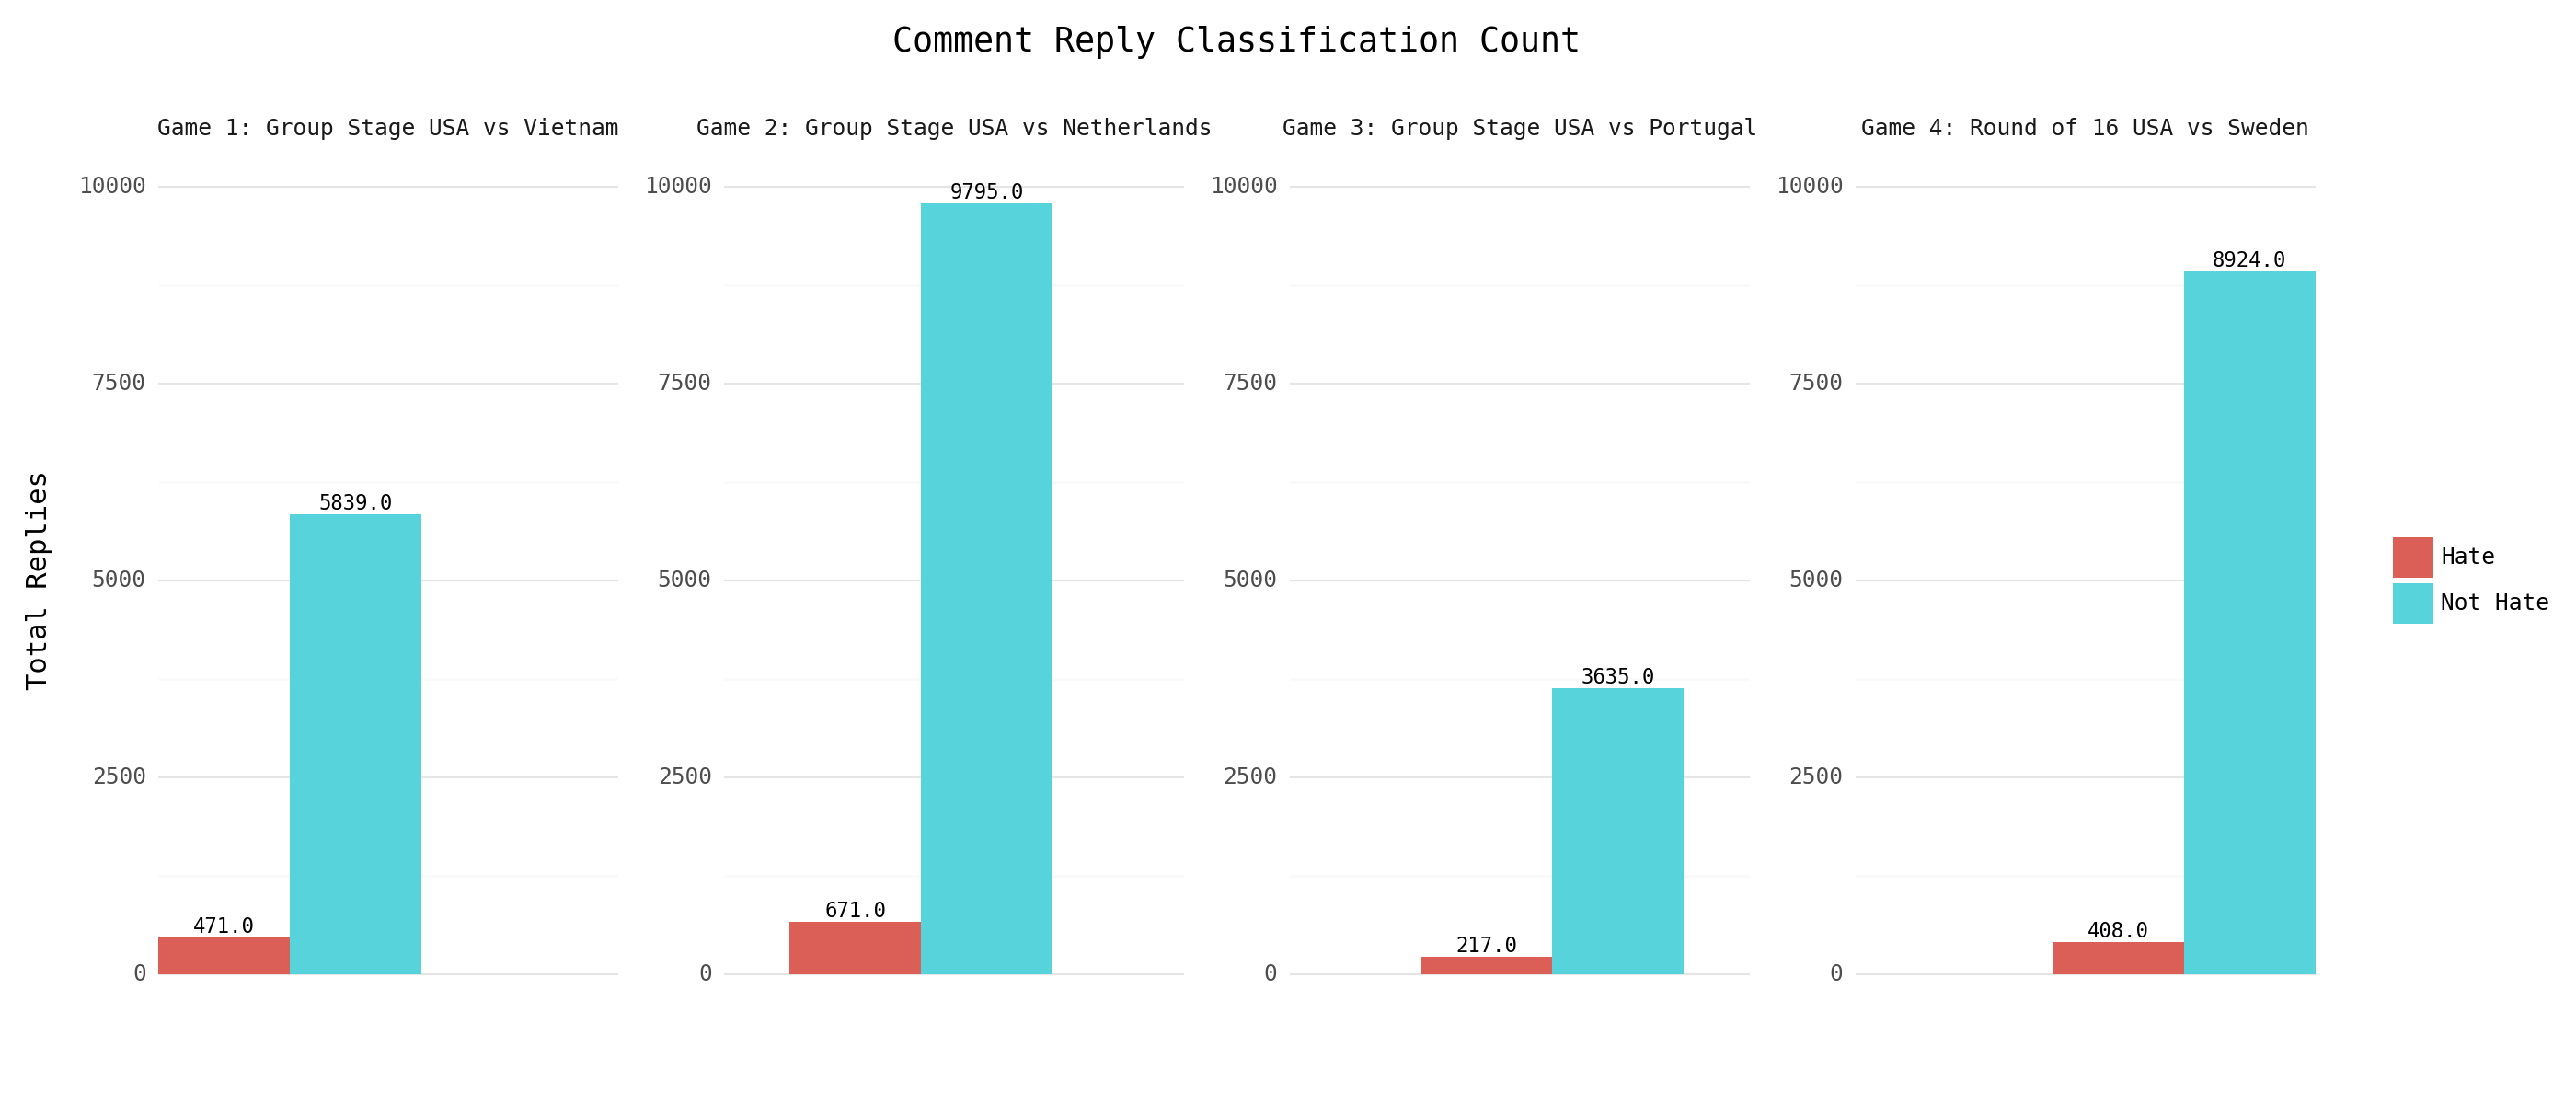

In [18]:
#Side by Side bar chart of Number of likes on hate speech vs non hate speech by game
total_comments_plot = (
    ggplot(total_comments, aes(x='Game Number', y='Total Replies', fill='label', label = 'Total Replies')) +
    geom_bar(stat='identity', position='dodge', width=4) +
    geom_text(position=position_dodge(width = 4), size=8, va='bottom') +
    facet_wrap('Game Number', scales='free_y', nrow=1) +
    labs(title='Comment Reply Classification Count', x='', y='Total Replies') +
    scale_y_continuous(limits=(0, 10000)) +
    theme_minimal() +
    theme(
        figure_size=(14, 6),
        axis_text_x=element_blank(),
        text=element_text(family='monospace'),
        plot_title=element_text(hjust=0.5, family='monospace'),
        panel_grid_major_x=element_blank(),
        legend_title=element_blank()
    )
)

print(total_comments_plot)

In [19]:
#Group number of likes by game and whether hate speech vs not hate speech 
total_likes = df.groupby(['Game Number', 'roberta_label'])['comment_like_count'].size().reset_index(name='Total Likes')
total_likes['label'] = total_likes['roberta_label'].replace({0: 'Not Hate', 1: 'Hate'})

In [20]:
total_likes

,Game Number,roberta_label,Total Likes,label
0,Game 1: Group Stage USA vs Vietnam,0,10882,Not Hate
1,Game 1: Group Stage USA vs Vietnam,1,1604,Hate
2,Game 2: Group Stage USA vs Netherlands,0,22363,Not Hate
3,Game 2: Group Stage USA vs Netherlands,1,2395,Hate
4,Game 3: Group Stage USA vs Portugal,0,10243,Not Hate
5,Game 3: Group Stage USA vs Portugal,1,1109,Hate
6,Game 4: Round of 16 USA vs Sweden,0,19526,Not Hate
7,Game 4: Round of 16 USA vs Sweden,1,3181,Hate


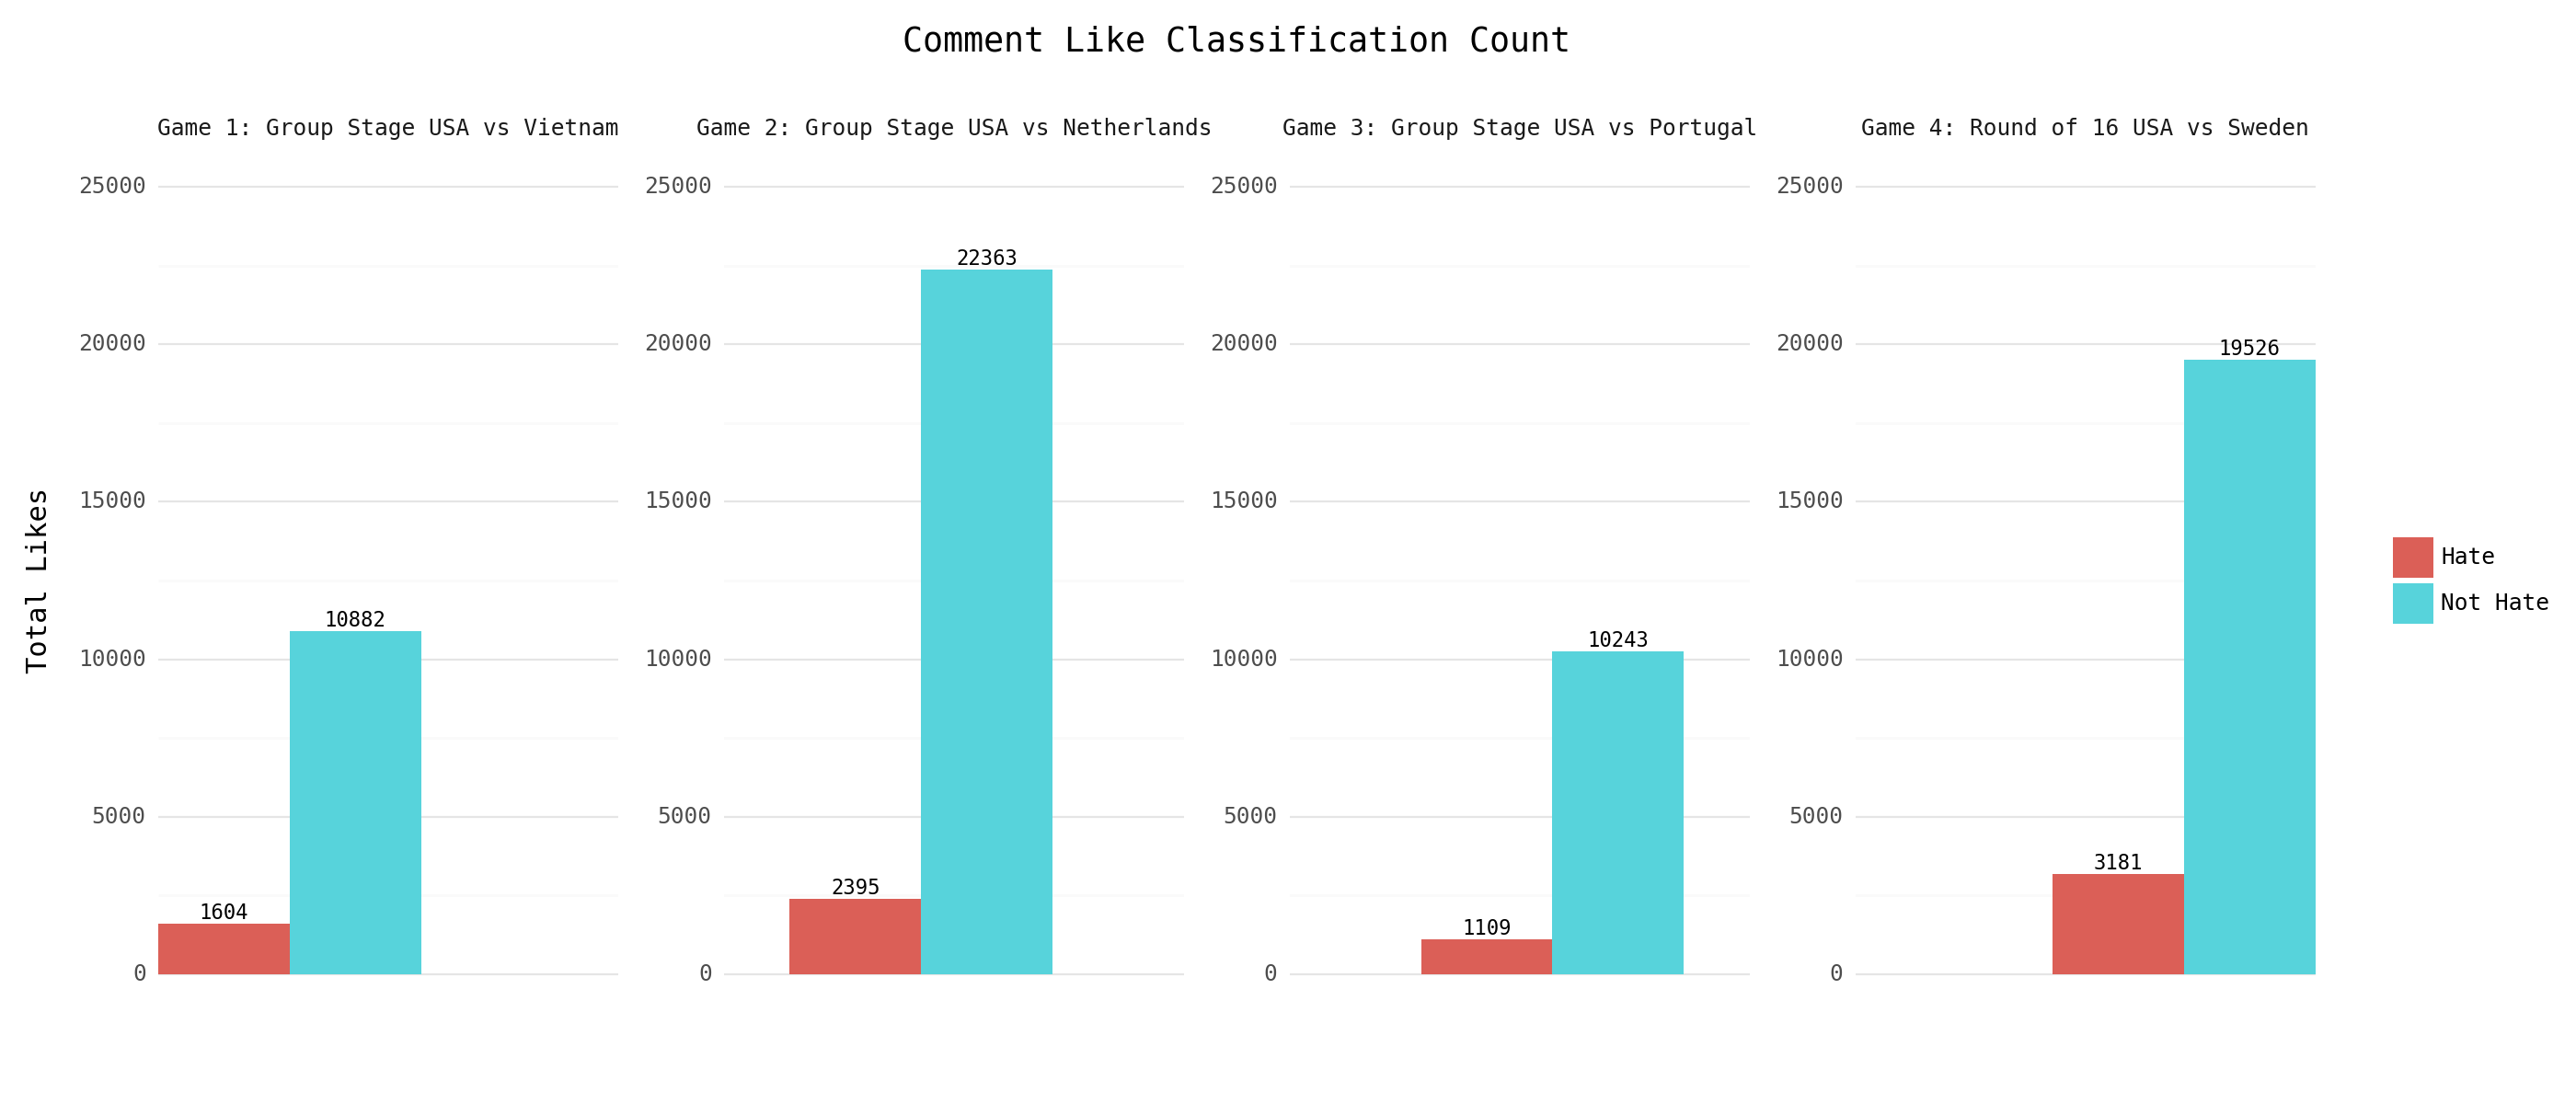

In [21]:
#Side by Side bar chart of Number of likes on hate speech vs non hate speech by game
total_comments_plot_2 = (
    ggplot(total_likes, aes(x='Game Number', y='Total Likes', fill='label', label = 'Total Likes')) +
    geom_bar(stat='identity', position='dodge', width=4) +
    geom_text(position=position_dodge(width = 4), size=8, va='bottom') +
    facet_wrap('Game Number', scales='free_y', nrow=1) +
    labs(title='Comment Like Classification Count', x='', y='Total Likes') +
    scale_y_continuous(limits=(0, 25000)) +
    theme_minimal() +
    theme(
        figure_size=(14, 6),
        axis_text_x=element_blank(),
        text=element_text(family='monospace'),
        plot_title=element_text(hjust=0.5, family='monospace'),
        panel_grid_major_x=element_blank(),
        legend_title=element_blank()
    )
)

print(total_comments_plot_2)